Рогович Татьяна, Валентин Бирюков

# Python для анализа данных
## Самые базовые предсказания: работаем с Titanic на kaggle

Мы уже немного познакомились с Титаником. Сегодня мы попробуем поучаствовать в тренировочном соревновании на kaggle: посмотрим, как это все в принципе работает, сделаем пару предсказаний (пока без статистических моделей, только на основе здравого смысла).

Чтобы участвовать в соревнованиях и скачивать данные, нужно зарегистрировать профиль на kaggle и залогиниться. Мы сегодня работаем с соревнованием по "Титанику".
https://www.kaggle.com/c/titanic/overview

Скачаем и откроем (или загрузим из ссылок) все три набора данных, которые лежат во вкладке Data.

In [98]:
import pandas as pd
import numpy as np
% matplotlib inline

In [20]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submission = pd.read_csv('gender.csv')

Инспектируем.
Это датасет, с которым мы уже работали, здесь 891 пассажир и для них мы знаем значение признака Survived.

In [24]:
display(train.head())
display(train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

А это так называемая тестовая выборка. В ML мы строим модель на тренировочных данных, для которых знаем значение зависимой переменной, и проверяем качество нашей модели на тестовых данных, для которых мы тоже знаем эту метку, но прячем ее от компьютера. Чтобы потом сравнить, что предсказал алгоритм с реальным значением. В kaggle тестовую метку Survived мы не видим, поэтому, чтобы проверить наше предсказание нам надо загрузить файл на сервер Kaggle, чтобы он его проверил (сравнил ваш ответ с правильным) и выдал вам оценку.

In [23]:
display(test.head())
display(test.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

В нашем соревновании лежит файл submission example, который показывает вам, как должен выглядеть файл для загрузки. В некоторых соревнованиях все устроено также, а в других вам надо загружать код, который будет обрабатывать скрытую тестовую выборку прямо на сервере.

In [25]:
display(submission.head())
display(submission.shape)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


(418, 2)

Видим, что здесь только две колонки - id пассажира и метка Survived. Обратите внимание, что это пассажиры из тестовой выборки. 

Помните, мы заполняли значение возраста? Одна из наших моделей сегодня будет учитывать возраст. Давайте посмотрим, есть ли пропущенные значения в тестовой выборке.

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Ок, есть. Давайте заполним пропуски - создадим поле `Title` в которое положим обращение к человеку.

In [32]:
def get_title(name):
    # ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
    pass

In [35]:
train['Title'] = # magic
test['Title'] = # magic

Проверяем уникальные значения.

In [40]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Jonkheer          1
Sir               1
Ms                1
Capt              1
the Countess      1
Don               1
Mme               1
Name: Title, dtype: int64

In [38]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Заполним отсутствующие значения возраста, опираясь на титул. Положим туда значение медианного возраста для "титула"

In [44]:
train['Age'] = train["Age"].fillna#

In [45]:
test['Age'] = test["Age"].fillna#

Проверяем, остались ли пропущенные значения в возрасте.

In [47]:
test[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
Age    418 non-null float64
dtypes: float64(1)
memory usage: 3.3 KB


In [48]:
train[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    891 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


Ура! Все получилось. Переходим к тестированию наших гипотез.

# Гипотеза 1. Все утонули.

Когда мы начинаем анализ, мы впервую очередь смотрим на распределение нашей целевой (зависимой) переменной. Здесь мы хотим предсказывать Survived.

In [50]:
train['Survived'].value_counts(normalize=True) # параметр normalize сразу выдает нам пропорции, а не абсолютные значения.

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Мы видим, что большинство пассажиров утонуло. Это будет наша baseline model - давайте попробуем сделать предсказание, что все утонули. Мы будем сегодня смотреть другой пример и там такой baseline очень мощный и улучшать его сложно. 

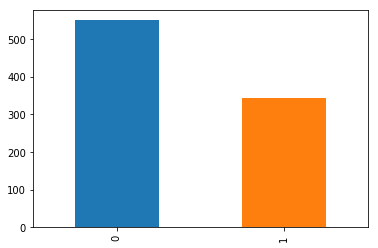

In [57]:
train['Survived'].value_counts().plot(kind='bar')

Чтобы протестировать наше предположение - запишем его в файл и отправим на сервер.

In [58]:
submission['Survived'] = 0 # ставим метку 0 во все ряды

In [60]:
submission.to_csv('alldied.csv', index = False) # если не поставим index = False, то сохраним индекс в отдельную колонку и такой формат файла не пройдет валидатор

Получили оценку! Наш score 0.62679. Для бинарной переменной этой значит, что мы всего в 62% случаев оказались правы. Давайте попробуем улучшить наше предсказание.

# Гипотеза 2. Спасаем женщин.

Если хоть что-то знаете про "Титаник", то наверняка помните историю про "первыми спасаем женщин и детей". Давайте попробуем улучшить наше предсказание, основывая на половом признаке.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Возможно, наше предположение верно. Пропорция выживших женщин больше пропорции выживших мужчин. Перезапишем наш файл.

In [65]:
submission['Survived'] = test['Sex'].apply(???)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
submission.to_csv('gender.csv', index = False)

0.77! Неплохо, учитывая, что это была совсем простая эвристика. Попробуем еще лучше?


# Гипотеза 3. Женщины и дети

А теперь давайте посмотрим, что там с возрастом.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

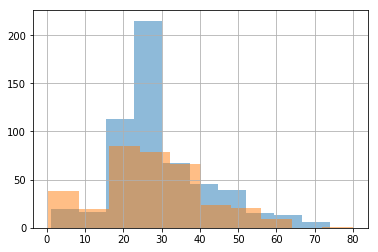

In [73]:
train.groupby('Survived')['Age'].hist(alpha = 0.5, bins = 10) # параметр alpha задает прозрачность графика, bins - размер групп

Тут можно идти по возрастным группам и предполжить, что дети до 10 лет имели больше шансов выжитть, а вот молодые люди от 15 до 30 лет, скорее погибнуть. Но такое сложно условие уже оставим для решающих деревьев (они позже в курсе), а только скорректируем предсказание для детей младше 10 лет. Заодно посмотрим, как задавать новую переменную через метод библиотеки numpy.where

In [114]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [115]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
submission.to_csv('gender_child.csv', index = False)

0.77! Еще немного лучше. Давайте еще добавим в условие нашу переменную Alone (для тех, кто путешествовал в одиночку

# Гипотеза 4. Женщины, дети и одинокие люди


Создадим новую переменную в обоих наборах данных (как мы делали на прошлом занятии) - положим в нее бинарный признак - был ли человек один (базируясь на полях SibSp и Parch)

In [129]:
train['Alone'] = ???
test['Alone'] = ??

In [130]:
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0


Построим аналогичные гистограмы для распределений

In [132]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Sex     Alone  Survived
female  0      1           0.712766
               0           0.287234
        1      1           0.785714
               0           0.214286
male    0      0           0.728916
               1           0.271084
        1      0           0.844282
               1           0.155718
Name: Survived, dtype: float64

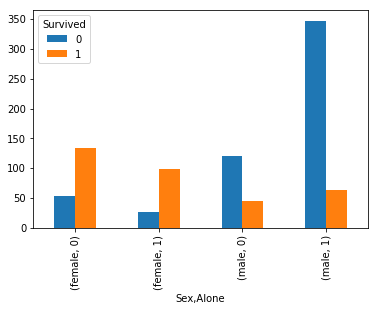

In [133]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Что можно пронаблюдать здесь? Какое можно сделать предсказание?